                        Анализ факторов, оказывающих влияние на заработную плату на рынке труда в России

Доказано, что на формирование заработной платы оказывают влияние большое количество различных факторов. Помимо достаточно очевидных факторов таких, как образование, предыдущий опыт работы, количество отработанных часов, на заработок также могут влиять и индивидуальные характеристики трудящегося, например, пол, возраст, национальная принадлежность. Это, в свою очередь, может привести к неравному положению людей на рынке труда, другими словами, к дискриминации.
В этом проекте наша основная задача - оценить, какие факторы оказывают значимое влияние на заработную плату и с какими трудностями сталкиваются люди на рынке труда в России в 2016 году. 

На первом этапе скачаем и подкючим необходимые нам бибилиотеки.

In [1]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy.polynomial.polynomial as poly
%matplotlib inline
np.set_printoptions(suppress=True) #чтобы оценки были более наглядные

Теперь скачаем данные, представленные НИУ ВШЭ https://www.hse.ru/rlms/ за 2016 год, преобразуем их и представим описательную статистику датасета. 

In [2]:
dataframe = pd.read_stata('r25i_os26с.dta', convert_categoricals=False)

In [3]:
dataframe.head()

,idind,uredid_i,uid_i,uid_h,tid_i,tid_h,sid_i,sid_h,rid_i,rid_h,...,um101,um102,um103,um104,um105,um106,um107,um108,um109,um111
0,3.0,146901.0,1001201.0,10012.0,1001201.0,10012.0,1001201.0,10012.0,1001201.0,10012.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.0,147101.0,1000301.0,10003.0,1000301.0,10003.0,1000301.0,10003.0,1000301.0,10003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,146801.0,1000401.0,10004.0,1000401.0,10004.0,1000401.0,10004.0,1000401.0,10004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36.0,145501.0,1002401.0,10024.0,1002401.0,10024.0,1002401.0,10024.0,1002401.0,10024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,37.0,145502.0,1002402.0,10024.0,1002402.0,10024.0,1002402.0,10024.0,1002402.0,10024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
columns_to_keep = ["u_age","uj13_2","uh5","ui4","u_diplom","uj6_2","status","um3","uj161_3y"] 
#как мы видим, в превоначальном датасете у нас 863 колонки, но нам необходимо всего несколько факторов, которые мы будет оценивать

In [5]:
df = pd.read_stata('r25i_os26с.dta', convert_categoricals=False, columns = columns_to_keep)

In [6]:
df.head()

,u_age,uj13_2,uh5,ui4,u_diplom,uj6_2,status,um3,uj161_3y
0,61.0,28000.0,2.0,1.0,4.0,48.0,3.0,3.0,42.0
1,72.0,NaN,2.0,1.0,2.0,NaN,3.0,3.0,40.0
2,70.0,NaN,2.0,1.0,5.0,NaN,3.0,3.0,44.0
3,62.0,NaN,2.0,1.0,2.0,NaN,3.0,3.0,34.0
4,59.0,21000.0,1.0,1.0,4.0,48.0,3.0,3.0,34.0


In [7]:
df.rename(columns={'u_age': 'age', 'uj13_2': 'salary', 'uh5': 'gender', 'uj6_2': 'work_week', 'uj161_3y': 'experience', 'u_diplom': 'diploma', 'ui4': 'nationality', 'um3': 'health'}, inplace=True)
print(df)

        age   salary  gender  nationality  diploma  work_week  status  health  \
0      61.0  28000.0     2.0          1.0      4.0       48.0     3.0     3.0   
1      72.0      NaN     2.0          1.0      2.0        NaN     3.0     3.0   
2      70.0      NaN     2.0          1.0      5.0        NaN     3.0     3.0   
3      62.0      NaN     2.0          1.0      2.0        NaN     3.0     3.0   
4      59.0  21000.0     1.0          1.0      4.0       48.0     3.0     3.0   
...     ...      ...     ...          ...      ...        ...     ...     ...   
12549   7.0      NaN     2.0          NaN      NaN        NaN     4.0     2.0   
12550  47.0  12000.0     2.0          1.0      4.0       10.0     4.0     3.0   
12551   9.0      NaN     2.0          NaN      NaN        NaN     4.0     2.0   
12552   1.0      NaN     1.0          NaN      NaN        NaN     4.0     2.0   
12553   0.0      NaN     1.0          NaN      NaN        NaN     4.0     3.0   

       experience  
0      

In [8]:
#для удобства переименовали переменные
df.head()

,age,salary,gender,nationality,diploma,work_week,status,health,experience
0,61.0,28000.0,2.0,1.0,4.0,48.0,3.0,3.0,42.0
1,72.0,NaN,2.0,1.0,2.0,NaN,3.0,3.0,40.0
2,70.0,NaN,2.0,1.0,5.0,NaN,3.0,3.0,44.0
3,62.0,NaN,2.0,1.0,2.0,NaN,3.0,3.0,34.0
4,59.0,21000.0,1.0,1.0,4.0,48.0,3.0,3.0,34.0


In [9]:
#удалим следующие ответы респондентов: "не знаю", "затрудняюсь ответить" и т.д. 
df = df[(-df.age.isin(["99999997","99999998","99999999"]))]
df = df[(-df.salary.isin(["99999997","99999998","99999999","0"]))]
df = df[(-df.gender.isin(["99999997","99999998","99999999"]))]
df = df[(-df.nationality.isin(["99999997","99999998","99999999"]))]
df = df[(-df.diploma.isin(["99999997","99999998","99999999"]))]
df = df[(-df.work_week.isin(["99999997","99999998","99999999"]))]
df = df[(-df.status.isin(["99999997","99999998","99999999"]))]
df = df[(-df.health.isin(["99999997","99999998","99999999"]))]
df = df[(-df.experience.isin(["99999996","99999997","99999998","99999999"]))]

In [10]:
print(df)

        age   salary  gender  nationality  diploma  work_week  status  health  \
0      61.0  28000.0     2.0          1.0      4.0       48.0     3.0     3.0   
1      72.0      NaN     2.0          1.0      2.0        NaN     3.0     3.0   
2      70.0      NaN     2.0          1.0      5.0        NaN     3.0     3.0   
3      62.0      NaN     2.0          1.0      2.0        NaN     3.0     3.0   
4      59.0  21000.0     1.0          1.0      4.0       48.0     3.0     3.0   
...     ...      ...     ...          ...      ...        ...     ...     ...   
12549   7.0      NaN     2.0          NaN      NaN        NaN     4.0     2.0   
12550  47.0  12000.0     2.0          1.0      4.0       10.0     4.0     3.0   
12551   9.0      NaN     2.0          NaN      NaN        NaN     4.0     2.0   
12552   1.0      NaN     1.0          NaN      NaN        NaN     4.0     2.0   
12553   0.0      NaN     1.0          NaN      NaN        NaN     4.0     3.0   

       experience  
0      

In [11]:
#добавим бинарные переменные
#Russian = 1, если респондент принадлежит русской национальности, school = 1, если он закончил школу и так далее.
df['Russian'] = np.where(df['nationality'] == 1, 1 ,0)
df['school'] = np.where(df['diploma'] == 4, 1 ,0)
df['college'] = np.where(df['diploma'] == 5, 1 ,0)
df['university'] = np.where(df['diploma'] == 6, 1 ,0)
df['town'] = np.where(df['status'] == 1, 1, np.where(df['status'] == 2, 1 ,0))
df['good_health'] = np.where(df['health'] == 1, 1 , np.where(df['health'] == 2, 1 ,0))
df['male'] = np.where(df['gender'] == 1, 1 ,0)

In [12]:
#удалим строчки, в которых есть хотя бы 1 значение NA и восстановим индексацию
df = df.dropna()
df = df.reset_index()

In [13]:
print(df)

      index   age   salary  gender  nationality  diploma  work_week  status  \
0         0  61.0  28000.0     2.0          1.0      4.0       48.0     3.0   
1         4  59.0  21000.0     1.0          1.0      4.0       48.0     3.0   
2         5  33.0  40000.0     2.0          1.0      4.0       40.0     3.0   
3         6  48.0  15000.0     2.0          1.0      4.0       40.0     3.0   
4         8  62.0   9000.0     1.0          1.0      4.0       70.0     4.0   
...     ...   ...      ...     ...          ...      ...        ...     ...   
3948  12541  27.0  17000.0     2.0          9.0      5.0       40.0     4.0   
3949  12542  48.0  40000.0     1.0          4.0      4.0       60.0     4.0   
3950  12543  38.0  35000.0     1.0          1.0      5.0       44.0     4.0   
3951  12545  64.0  23000.0     1.0          1.0      6.0       40.0     4.0   
3952  12550  47.0  12000.0     2.0          1.0      4.0       10.0     4.0   

      health  experience  Russian  school  college 

In [14]:
columns = ['gender', 'nationality', 'diploma', 'status', 'health'] #удалим уже ненужные столбцы

In [15]:
 df = df.drop(columns, axis=1) 

In [16]:
#Теперь изобразим описательные характеристики нашего датасета 
df.describe()

,index,age,salary,work_week,experience,Russian,school,college,university,town,good_health,male
count,3953.000000,3953.000000,3953.000000,3953.000000,3953.000000,3953.000000,3953.000000,3953.000000,3953.000000,3953.000000,3953.000000,3953.000000
mean,6148.789780,42.489755,24347.707058,43.064255,20.072097,0.897040,0.273463,0.274981,0.369087,0.729067,0.430559,0.444473
std,3524.632225,12.394227,17894.899968,12.051799,12.801352,0.303945,0.445793,0.446561,0.482619,0.444498,0.495217,0.496970
min,0.000000,18.000000,50.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3161.000000,32.000000,13400.000000,40.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6146.000000,42.000000,20000.000000,40.000000,18.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,9179.000000,53.000000,30000.000000,48.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,12550.000000,80.000000,240000.000000,168.000000,62.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Теперь приступим к построению регрессий. Сначала рассмотрим линейную регрессию и построим график, в качестве зависимой переменной выступает salary. 

In [17]:
x = df[['age','male','Russian','school','college','university','town','good_health','work_week','experience']].values
y = df['salary'].values

In [18]:
x

array([[61.,  0.,  1., ...,  0., 48., 42.],
       [59.,  1.,  1., ...,  0., 48., 34.],
       [33.,  0.,  1., ...,  0., 40.,  7.],
       ...,
       [38.,  1.,  1., ...,  0., 44., 15.],
       [64.,  1.,  1., ...,  0., 40., 40.],
       [47.,  0.,  1., ...,  0., 10., 18.]])

In [19]:
#зададим функцию, которая будет определять оценки параметров нашей линейной регрессии методом МНК
def fitLin(x, y):
    A = np.concatenate( [np.ones((len(x),1)), x ], axis=1 )
    AA = np.linalg.pinv(A)
    d = AA.dot(y)
    return d

In [20]:
d = fitLin(x, y)
print(np.round(d,3))

[ 7068.5    -288.516  7835.426  -228.749  1627.14   3902.892 13022.099
  6462.082  1991.476   208.792   267.84 ]


In [65]:
#теперь зададим функцию, которая будет вычислять оценочные значения для модели
def evalLine(d, x):
    e = np.zeros((x.shape[0],1)) + d[0] # пустой маасив из нулей с константой
    for i in range(x.shape[0]):
        e[i,0] += poly.polyval(x[i], d[1:])[0]
    return e

In [66]:
evalLine(d,x)

array([[3.24778598e+15],
       [2.46725984e+15],
       [1.29141620e+13],
       ...,
       [4.85240212e+13],
       [4.77522904e+15],
       [3.40778022e+14]])

In [37]:
#наконец необходимо задать функцию для вычисления стандартной и квадратичной ошибки модели
def errLine(d, x, y):
    z =  evalLine(d,x) - y.reshape(x.shape[0],1)
    return np.sum(z)/x.shape[0], np.sum(z**2)/x.shape[0]

In [38]:
errLine(d, x, y)

(9.133535574174307e+17, 6.946467092092565e+36)

Рассмотрим, как можно улучшить нашу модель. Для этого представим распределение некоторых перменных.

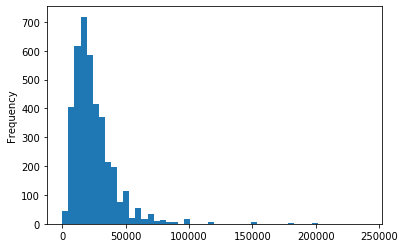

In [39]:
#посмотрим на распределение заработной платы
#стоит отметить, что распределение, представленное на грфике, не является нормальным, поэтому возьмем логарифм данной величины и пронормируем таким образом
df['salary'].plot.hist(bins=50)

In [47]:
df['ln_salary'] = np.log10(df['salary'])

In [48]:
df.head()

,index,age,salary,work_week,experience,Russian,school,college,university,town,good_health,male,ln_salary
0,0,61.0,28000.0,48.0,42.0,1,1,0,0,0,0,0,4.447158
1,4,59.0,21000.0,48.0,34.0,1,1,0,0,0,0,1,4.322219
2,5,33.0,40000.0,40.0,7.0,1,1,0,0,0,0,0,4.602060
3,6,48.0,15000.0,40.0,22.0,1,1,0,0,0,0,0,4.176091
4,8,62.0,9000.0,70.0,44.0,1,1,0,0,0,1,1,3.954243


In [49]:
y = df['ln_salary'].values
d = fitLin(x, y)
print(np.round(d,3))

[ 4.052 -0.007  0.145 -0.012  0.036  0.076  0.219  0.115  0.036  0.004
  0.006]


Text(0, 0.5, 'Salary')

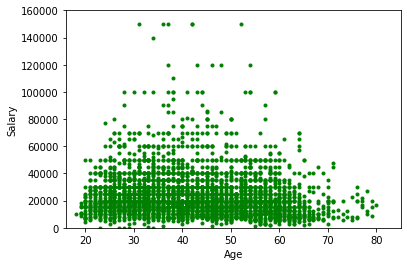

In [50]:
#представим зависимость "salary" от "age" в виде рассеянной диаграммы
plt.scatter(df['age'], df['salary'], c='g', marker = ".", cmap='viridis')
plt.xlim(16, 85)
plt.ylim(0, 160000)
plt.xlabel( 'Age' ) 
plt.ylabel( 'Salary')

In [51]:
#поскольку в среднем более низкие доходы, как правило, имеют пожилые или, наборот, молодые люди, то возведем переменную, отвчающую за возраст, в квадрат
#добавим к нашему датасету квадрат переменной "age"
df['sq_age'] = np.square(df['age'])

In [52]:
x = df[['age','sq_age','male','Russian','school','college','university','town','good_health','work_week','experience']].values
d = fitLin(x, y)
print(np.round(d,3))

[ 3.606  0.015 -0.     0.147 -0.012  0.031  0.079  0.217  0.122  0.039
  0.004  0.007]


Text(0, 0.5, 'Salary')

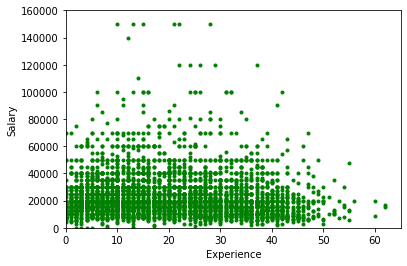

In [53]:
#рассмотрим зависимость переменной "salary" от "experience"
plt.scatter(df['experience'], df['salary'], c='g', marker = ".", cmap='viridis')
plt.xlim(0, 65)
plt.ylim(0, 160000)
plt.xlabel( 'Experience' ) 
plt.ylabel( 'Salary') 

In [54]:
#добавим к нашему датасету квадрат переменной "experience", поскольку зарплата зависит не только от опыта, но и от опыта в квадрате
df['sq_exp'] = np.square(df['experience'])

In [55]:
x = df[['age','sq_age','male','Russian','school','college','university','town','good_health','work_week','experience','sq_exp']].values
d = fitLin(x, y)
print(np.round(d,3))

[ 3.766  0.005 -0.     0.147 -0.012  0.031  0.077  0.215  0.121  0.039
  0.004  0.013 -0.   ]


In [57]:
errLine(d, x, y)

(872213250339841.0, 4.4691075167557945e+30)

Проверим, действительно ли это решение - минимум суммы квадратов отклонений.

In [58]:
###Функция для квадратичной ошибки
def errLine_squared(d, x, y):
    z =  evalLine(d,x) - y.reshape(x.shape[0],1)
    return np.sum(z**2)/x.shape[0]

In [60]:
opt.minimize(errLine_squared, d , args=(x, y), method="Nelder-Mead")

KeyboardInterrupt: 

In [37]:
d1 = opt.minimize( errLine_squared, d , args=(x, y), method="Nelder-Mead").x
print(np.round(d1,3))

[ 3.766  0.005 -0.     0.147 -0.012  0.031  0.077  0.215  0.121  0.039
  0.004  0.013 -0.   ]


Получили, что наш результат является локальным минимумом для квадратичной ошибки, как впринципе и ожидалось. Попробуем по-другому задать ошибку: Можно предположить, что когда мы недооцениваем зарплату (то есть зарплата очень высокая), это нормально, так как высокие зарплаты обусловлены стечение многих ненаблюдаемых факторов. Для таких случаев вес ошибки оставим равным 1. Случай когда мы переоцениваем хуже - для него коэффициент линейной ошибки поставим равным 2.

In [38]:
def errLine_modified(d, x, y):
    z =  evalLine(d,x) - y.reshape(x.shape[0],1)
    for i in list(range(z.shape[0])) :
        if z[i,] > 0 :
            z[i,] = z[i,] * 2
        else:
            z[i,] = z[i,] 
    return np.sum(z)/x.shape[0]

In [39]:
errLine_modified(d, x, y)

0.09065254937343467

Теперь через minimize посчитаем минимум для нашей модели при такой функции ошибок.

In [40]:
#Проблема в том, что требует много итераций, пока остановились на 3000, можно поменять, но длительность выполнения растет. Для
#такого количества факторов нужно очень много итераций, можно попробовать уменьшить количество факторов/увеличить количество
#итераций. (пробовали с количество итераций 10000 все равно не сходился л)
opt.minimize(errLine_modified, d , args=(x, y), method="Nelder-Mead", options = {'maxiter': 3000})

 final_simplex: (array([[-5.17018565e+52,  1.00705217e+49, -2.09426873e+47,
         2.35282270e+50, -3.49858466e+49, -4.39291125e+49,
         1.39968148e+50,  2.09851403e+50, -2.71864549e+50,
        -2.01817796e+49,  1.76963824e+49, -1.21327358e+49,
        -1.70285257e+47],
       [-4.21924406e+52,  8.21827138e+48, -1.70907420e+47,
         1.92007287e+50, -2.85509720e+49, -3.58493214e+49,
         1.14224095e+50,  1.71253867e+50, -2.21861063e+50,
        -1.64697865e+49,  1.44415233e+49, -9.90118669e+48,
        -1.38965041e+47],
       [-4.17938272e+52,  8.14062920e+48, -1.69292771e+47,
         1.90193296e+50, -2.82812365e+49, -3.55106347e+49,
         1.13144962e+50,  1.69635945e+50, -2.19765029e+50,
        -1.63141881e+49,  1.43050869e+49, -9.80764515e+48,
        -1.37652168e+47],
       [-4.09950211e+52,  7.98503722e+48, -1.66057075e+47,
         1.86558129e+50, -2.77406967e+49, -3.48319193e+49,
         1.10982420e+50,  1.66393690e+50, -2.15564657e+50,
        -1.60023747e

Попробуем сделать регуляризацию типа L2 - добавить к ошибке средний квадрат коэффициентов, чтобы посмотреть какие из них будут зануляться. Они скорее всего не так важны.

L1: есть существенные ошибки (пример с раком), а есть несушественные, то есть мы присваиваем веса ошибкам разного рода. L2: убирает все незначимые переменные (ставит к-т = 0 перед ними).

In [61]:
def errLine_L2(d, x, y):
    z =  evalLine(d,x) - y.reshape(x.shape[0],1)
    return np.sum(z**2)/x.shape[0] + np.sum(d**2)/d.shape[0] # средняя квадратичная ошибка

In [42]:
opt.minimize(errLine_L2, d , args=(x, y), method="Nelder-Mead", options = {'maxiter': 5000}) # maxiter - максимальное количество итераций

 final_simplex: (array([[ 1.04775877,  0.06106993, -0.00022181, -0.15411861,  0.19566098,
        -0.04533133, -0.25895213, -0.01425211,  0.23300335,  0.34873945,
         0.01499633,  0.04208156, -0.00144489],
       [ 1.04777783,  0.06106495, -0.00022178, -0.15415853,  0.19566621,
        -0.0452903 , -0.25893093, -0.01418776,  0.23302201,  0.34871559,
         0.01499845,  0.04208321, -0.00144492],
       [ 1.04781227,  0.06106226, -0.0002217 , -0.1540984 ,  0.19565101,
        -0.04535216, -0.25890494, -0.01420952,  0.23297331,  0.34874853,
         0.01499816,  0.04208263, -0.00144493],
       [ 1.04774564,  0.06106443, -0.00022172, -0.15413765,  0.19564763,
        -0.04533873, -0.25896881, -0.01418898,  0.23305026,  0.34874032,
         0.01499908,  0.0420758 , -0.00144483],
       [ 1.04781181,  0.06106524, -0.00022176, -0.15412391,  0.19565159,
        -0.04535347, -0.25894198, -0.01415577,  0.23300465,  0.34873035,
         0.01499686,  0.04208184, -0.0014449 ],
       [ 1.04

In [43]:
np.set_printoptions(suppress=True)
d2 = opt.minimize(errLine_L2, d , args=(x, y), method="Nelder-Mead", options = {'maxiter': 5000}).x
print (np.round(d2,3)) # оценки к-ов, при которых достигается минимум

[ 1.048  0.061 -0.    -0.154  0.196 -0.045 -0.259 -0.014  0.233  0.349
  0.015  0.042 -0.001]


Значительно снизилось значение константы в данном случае, в остальном значения коэффициентов практически не изменились. Таким образом предыдущая модель в целом была нормальной, будем рассматривать ее поведение на тренировочной/тестовой выборке

In [62]:
def experimentLin(p, k ):
    x = df[['age','sq_age','male','Russian','school','college','university','town','good_health','work_week','experience','sq_exp']].values
    y = df['ln_salary'].values
    d0 = fitLin(x, y)
    e0 = errLine(d0, x, y)
    
    ee10 = np.array([0.])
    ee11 = np.array([0.])
    for j in range(k):
        perm = np.random.permutation(x.shape[0])
        ii = perm[:int(x.shape[0] * p)]#np.random.randint(0, x.shape[0], int(x.shape[0] * p) )
        d1 = fitLin(x[ii], y[ii])
        e1 = errLine(d1, x, y)
        ee10 += e1[0]
        ee11 += e1[1]
    print( e0, [ee10 / k, ee11 / k] )

In [69]:
ee10 = np.array([0.])
ee10.shape

(1,)

In [63]:
experimentLin(0.8,10)

(872213250339841.0, 4.4691075167557945e+30) [array([8.31964919e+14]), array([4.14568944e+30])]


Получили примерно такую же квадратичную ошибку, переобучения нет, все хорошо. Модель адекватно описывает состояние на рынке труда на 2016 года. Действительно, можно заметить некую дискриминацию по таким показателям как пол, возраст, состояние здоровья.